<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-и-рассмотрение-подходов-к-решению-задачи-проекта" data-toc-modified-id="Изучение-данных-и-рассмотрение-подходов-к-решению-задачи-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение данных и рассмотрение подходов к решению задачи проекта</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Подходы-к-решению-задачи-проекта" data-toc-modified-id="Подходы-к-решению-задачи-проекта-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подходы к решению задачи проекта</a></span></li></ul></li><li><span><a href="#Первоначальный-подход-к-решению-задачи-проекта" data-toc-modified-id="Первоначальный-подход-к-решению-задачи-проекта-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Первоначальный подход к решению задачи проекта</a></span><ul class="toc-item"><li><span><a href="#Версия-1:-img2table-+-коррекция-разметки-+-pytesseract" data-toc-modified-id="Версия-1:-img2table-+-коррекция-разметки-+-pytesseract-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Версия 1: <code>img2table</code> + коррекция разметки + <code>pytesseract</code></a></span></li><li><span><a href="#Версия-2:-исправление-перспективы-+-img2table-+-коррекция-разметки-+-pytesseract" data-toc-modified-id="Версия-2:-исправление-перспективы-+-img2table-+-коррекция-разметки-+-pytesseract-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Версия 2: исправление перспективы + <code>img2table</code> + коррекция разметки + <code>pytesseract</code></a></span></li></ul></li><li><span><a href="#Измененный-подход-к-решению-задачи-проекта" data-toc-modified-id="Измененный-подход-к-решению-задачи-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Измененный подход к решению задачи проекта</a></span><ul class="toc-item"><li><span><a href="#Версия-3:-EasyOCR-+-парсинг" data-toc-modified-id="Версия-3:-EasyOCR-+-парсинг-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Версия 3: <em>EasyOCR</em> + парсинг</a></span></li></ul></li><li><span><a href="#Практическая-реализация-распознавания-текста" data-toc-modified-id="Практическая-реализация-распознавания-текста-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Практическая реализация распознавания текста</a></span><ul class="toc-item"><li><span><a href="#...-в-виде-скриптов" data-toc-modified-id="...-в-виде-скриптов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>... в виде скриптов</a></span></li><li><span><a href="#...-в-виде-docker-образа" data-toc-modified-id="...-в-виде-docker-образа-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>... в виде <em>docker</em>-образа</a></span></li></ul></li><li><span><a href="#Выводы-по-проекту" data-toc-modified-id="Выводы-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы по проекту</a></span></li></ul></div>

# Проект: "Донорская справка"

## Описание проекта

__Задача:__  
Социальная сеть доноров [DonorSearch](https://donorsearch.org/) занимается пропагандой донорства в России и популяризацией образа донора, стремясь увеличить число российских доноров - так как их нынешнее число пока считается недостаточным. В своей работе организация сталкивается с необходимостью обработки копий медицинских документов и занесением сведений из них в собственную базу данных. Необходимо организовать процесс сканирования этих документов. Причем, автоматически распознаваться должны только данные о донациях. Персональные данные доноров предполагается вносить вручную.

__Данные:__  
Исходные данные для проекта представляют собой фотографии учетных карточек доноров крови. Все они однотипные и заполнены по  _Форме № 405-05/у,_ утвержденной Утверждена приказом Минздравсоцразвития России от 31 марта 2005 г. №246. Кроме того имеются  csv-файлы с данными для уже обработанных карточек.

__Этапы проекта:__  
- изучить данные;
- предложить возможные решения задачи проекта;
- оценить результаты распознавания и уточнить подход к решению проблемы распознавания;
- реализовать распознавание текста в виде приложения;
- описать выводы и замечания по выполнению проекта.

## Изучение данных и рассмотрение подходов к решению задачи проекта

### Изучение данных

In [97]:
import os
from PIL import Image
import matplotlib.pyplot as plt

images = []
# путь к рабочей директории
this_dir = os.getcwd()
count = 0
# абсолютные пути к файлам в папках рабочей директории и названия файлов
for root, _, files in os.walk(this_dir):    
    for file in files:
        # только jpg-изображения
        if file.endswith(".jpg"):            
            img_path = os.path.join(root, file)
            with Image.open(img_path) as img:
                img.load()
                print('Название файла: {0}.\tРазмер изображения: {1}x{2}'.format(file, img.size[0], img.size[1]))
                count += 1
                # сохранение найденных файлов с список
                images.append((img_path, file, img.size, img))
print(f'\nВсего файлов изображений: {count}')                

Название файла: 141899 .jpg.	Размер изображения: 685x1000
Название файла: 204119 .jpg.	Размер изображения: 3024x4032
Название файла: 213950.jpg.	Размер изображения: 3413x4878
Название файла: 225629 .jpg.	Размер изображения: 3060x4080
Название файла: 227414.jpg.	Размер изображения: 1654x2338
Название файла: 228963 .jpg.	Размер изображения: 750x1000
Название файла: 231820 .jpg.	Размер изображения: 1205x1718
Название файла: 233749 .jpg.	Размер изображения: 3024x4032
Название файла: 236000 .jpg.	Размер изображения: 2268x4032
Название файла: 238716.jpg.	Размер изображения: 3024x4032
Название файла: 240493.jpg.	Размер изображения: 750x1000
Название файла: 243478 .jpg.	Размер изображения: 462x1000
Название файла: 245365 .jpg.	Размер изображения: 3000x4000
Название файла: 254586 .jpg.	Размер изображения: 701x1000
Название файла: 256578 .jpg.	Размер изображения: 750x1000
Название файла: 256838.jpg.	Размер изображения: 563x1000

Всего файлов изображений: 16


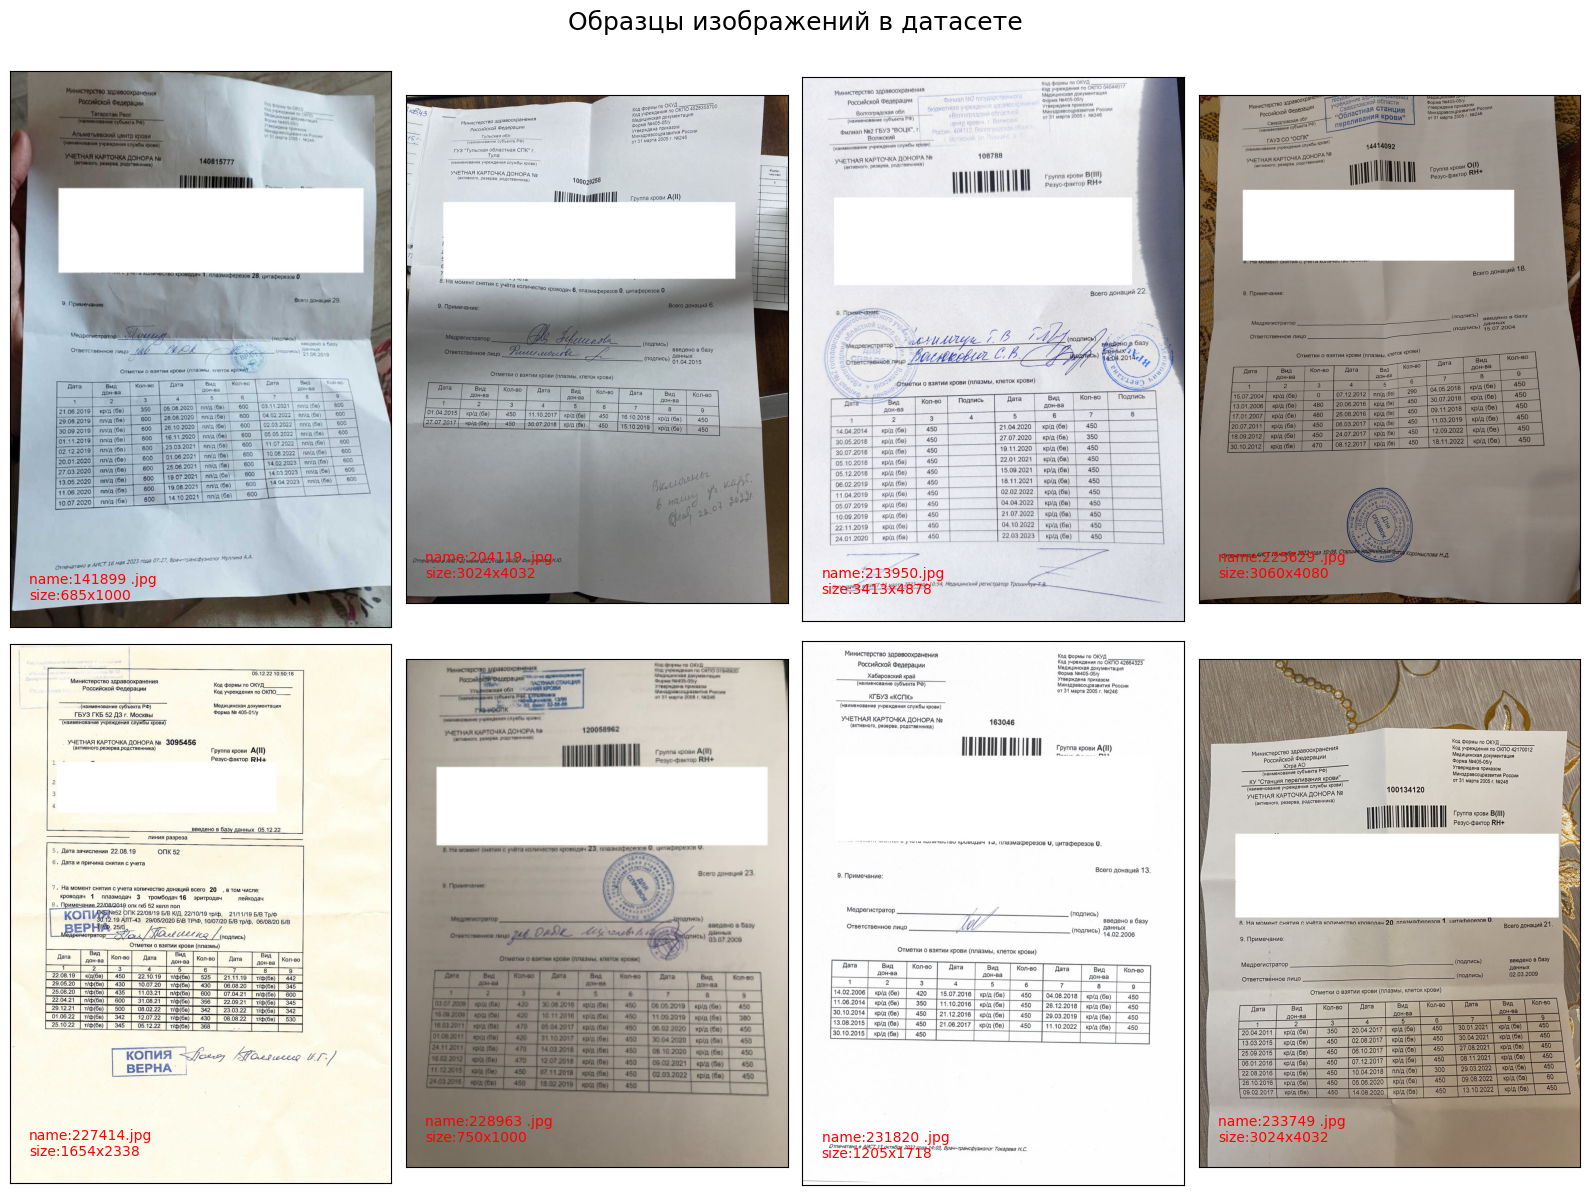

In [123]:
fig = plt.figure(figsize=(16, 12))
plt.suptitle('Образцы изображений в датасете', fontsize=18, verticalalignment='bottom')
for i in range(8):
    fig.add_subplot(2, 4, i+1)
    plt.imshow(images[i][-1])
    # поясняющий текст с названием файла и его разрешением
    ann = f'name:{images[i][1]}\nsize:{images[i][2][0]}x{images[i][2][1]}'
    # координаты текста аннотации
    ann_x = int(.05*images[i][2][0])
    ann_y = int(0.95*images[i][2][1])    
    plt.text(x=ann_x, y=ann_y, s=ann, color='r', fontsize=10)    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

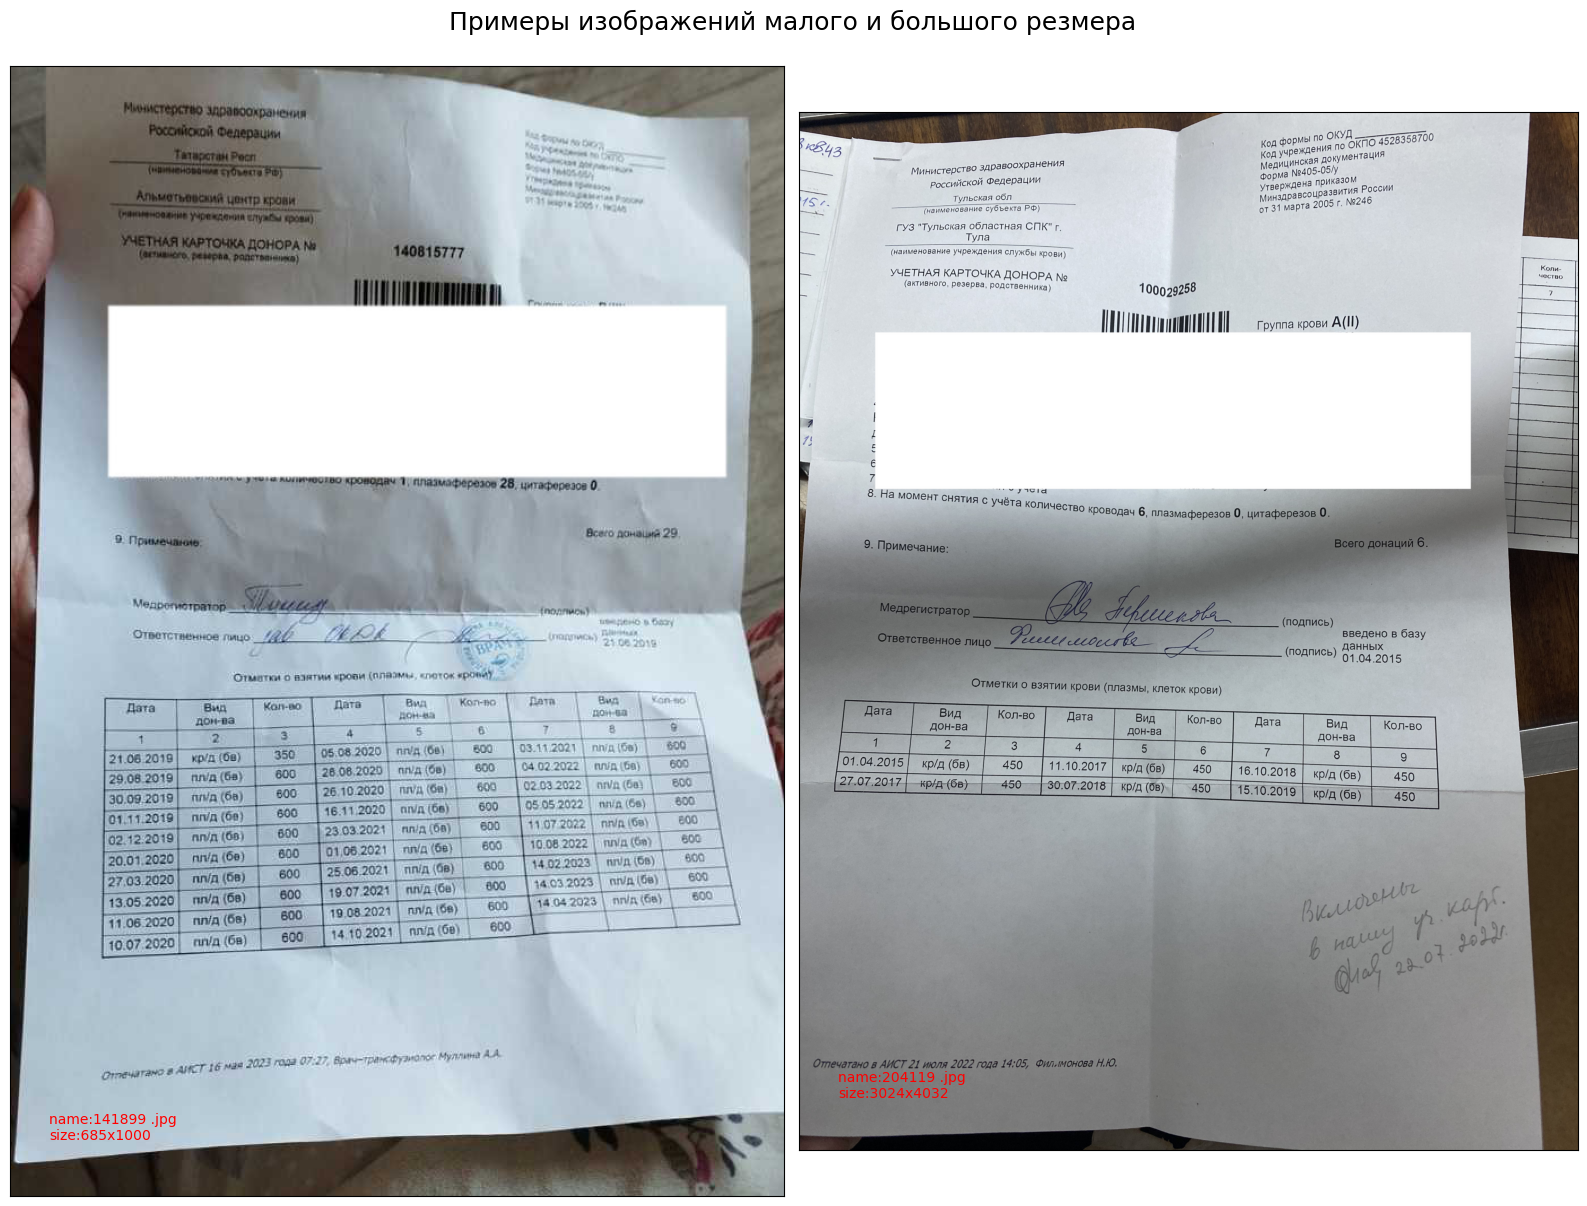

In [122]:
# примеры изображений малого и большого резмера
images_to_compare = [images[12], images[14]]

fig = plt.figure(figsize=(16, 12))
plt.suptitle('Примеры изображений малого и большого резмера', fontsize=18, verticalalignment='bottom')
for i in range(2):
    fig.add_subplot(1, 2, i+1)
    plt.imshow(images[i][-1])    
    # поясняющий текст с названием файла и его разрешением
    ann = f'name:{images[i][1]}\nsize:{images[i][2][0]}x{images[i][2][1]}'
    # координаты текста аннотации
    ann_x = int(.05*images[i][2][0])
    ann_y = int(0.95*images[i][2][1])
    plt.text(x=ann_x, y=ann_y, s=ann, color='r', fontsize=10)    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

Исходных данных (изображений) в проекте совсем немного.  
Сами изображения сильно отличаются по качеству. Их можно разделить на 3 категории:  
1. большого размера ~3000x4000 - 7 шт.
2. среднего... ~1200x1700 - 2 шт.
3. малого... ~700x1000 - 7 шт.

Кроме того, все изображения имеют уникальные искажения - замятия, складки, разные углы съёмки, наклоны. На всех изображениях имеются подписи и печати, и часть из них попадет в область таблицы донаций. Стоит заметить, что обычными требованиями к изображениям для их качественного распознавания являются разрешение в _300dpi_ (что соответствует изображениям 1-ой категории) и отсутствие на них геометрических искажений. Также лучше распознаются полноцветные изображения.


Отмеченные особенности накладывают серьезные ограничения на методы распознавания текста на изображениях: данных слишком мало для использования в обучении нейросетей, а разнообразные искажения не позволяют применить унифицированный подход к их устранению.

### Подходы к решению задачи проекта

Примеров изображений в проекте очень мало, и если не генерировать искусственные данные, то остается лишь использовать уже имеющиеся программы _оптического распознавания текста (OCR)._ Среди свободно распространяемых программ такого рода с поддержкой русского языка можно выделить две - _Tesseract_ и _EasyOCR_. При этом первая имеет долгую историю развития, к ее созданию приложили руку крупнейшие IT-гиганты - _Hewlett-Packard_ и _Google_, она продолжает поддерживаться последним и очень часто используется в опенсорсных проектах. Tesseract-у мы предпочтение и отдадим. Однако, эта OCR не учитывает структуры распознаваемого документа. Так что, потребуется еще выделить саму таблицу и ячейки в ней. Для этого можно использовать библиотеку `img2table`. Данная библиотека поддерживает обе предложенные системы распознавания текста.  

Таким образом, алгоритм распознавания будет следующим:
1. провести предобработку изображения для пtредачи в OCR;
2. с помощью `img2table` выделить на изображении таблицу;
3. за счет интеграции _OCR_ в `img2table` провести распознавание в ячейках (или использовать полученные координаты и провести распознавание самостоятельно);
4. распарсить полученные данные в соответствии заданной структурой полей в документе;
5. скорректировать неверно распознанные значения.

## Первоначальный подход к решению задачи проекта

### Версия 1: `img2table` + коррекция разметки + `pytesseract`

Система распознавания изображений было решено реализовать в виде класса `class Form405`. Он включает в себя [(первоначальная версия)](https://github.com/maresin/some_projects/blob/main/Form405_OCR/previouse_version/Form405_class_v1_with_img2table.ipynb) ряд атрибутов:  
- `image_file`                     - название исходного файла изображения с расширением
- `image_file`                     - название исходного файла изображения с расширением
- `table_extracted`                - извлеченная структура таблицы
- `person_id`                      - префикс названия файлов, соответствующих определенному пользователю
- `csv_recognised_path`            - путь к сгенерированному csv-файлу
- `image_original`                 - исходный изображенное в обработке
- ... и пр.  

И следующие методы (часть из кототорых приватные - `private`):
- `__init__(folder, file)` - инициализация класса и назначение пути к файлу изображения
- `__get_table_pos(table_extracted)` - функция определения структуры таблицы
- `__improve_type(stroke)` - функция коррекции записи для типа донорства
- `__check_adequacy(stroke, col_type)` - функция оценки адекватности распознавания
- `__check_cell_type(stroke, type_expected)` - функция проверки типа столбца
- `__get_rough_correcrion()` - функция агрессивной замены отсутствующих значений
- `make_preprocessing()` - функция предобработки изображения
- `get_table_coords()` - функция получения таблицы с координатами ячеек
- `get_row_coords(num_row, col_coords)` - функция получения координат ячеек для конкретного столбца\строки
- `recognize_cell(cell_coords, col_type, ocr_config, re_mask, prc_shrink)` - функция распознавания содержимого ячеек
- `get_dataframe()` - функция построение датафрейма из распознанных данных
- `estimate_accuracy()` - функция расчета точности распознавания

Подробно опишем алгоритм распознавания.  

__1. Предобработка изображения:__  
Определение структуры таблицы с помощью `img2table` на изображении предполагает соблюдение определенных требований к нему. и поэтому необходимо провести предобработку. Она включает в себя:  
- обрезку изображения (таблицы располагается в его нижней половине);
- конвертирование цвета в оттенки серого;
- добавление размытия для удаления шума;
- перевод изображения в бинарное через введения порогового значения.  

__2. Получение разметки таблицы:__  
Метод `img2table.extract_tables()` считывает структуры исследуемой таблицы не вполне корректно - могут добавляться дублирующие записи, число ячеек в строках таблицы также может не совпадать. Поэтому было решено скорректировать возвращаемые этим методом значения:
- возвращаемые значения сохраняются, подсчитываются средние размеры ячеек;
- проводится проверки на наличие расщепление ячеек, совпадение числа ячеек в строках, примерное совпадение их средних размеров;
- корректируется разметка таблицы за счет удаления дублирующих строк и объединения расщепленных ячеек.


__3. Определение структуры таблицы:__  
Таблица в карточке донора имеет 4 поля: _"Дата", "Вид донорства", "Количество" и "Подпись"._ Последнее поле используется редко, но число полей все-таки нужно уточнить, так как каждое из них имеет особенности в распознавании.  
Число строк в таблице не нормируется.

__4. Распознавание текста в ячейках:__  
Каждая ячейка таблицы распознается по отдельности (предусмотрен как проход по столбцам, так и по строкам таблицы), в соответствии с типом поля и с опорой на сохраненные ранее координаты ячеек: 
- определяется тип поля ячейки;
- получаются координаты ячейки;
- чтобы уточнить результаты распознавания для каждого типа данных используются свои "whitelist"-ы для программы _Tesseract_, а также свои маски регулярных выражений; 
- с помощью метода `pytesseract.image_to_string()` программы _Tesseract_ распознается содержимое ячеек;
- выборочно проверяется тип распознанного текста.  

__5. Уточнение распознанных данных:__  
Перед занесением распознанного текста ячейки в финальную таблицу текст в ней корректируется: 
- даты приводятся к единому формату, все разделители заменятся на `.`;
- типы донаций с помощью разного типа замен приводятся к некоторым наиболее полярным формам записей;
- аномальные значения в поле количества заменяются;
- все типы данных проходят проверку на адекватность (например, даты ограничиваются временным интервалом от даты утверждения формы документа до текущей даты) и некорректные значения заменятся записью `"UNKNOWN"`.  

__6. Сохранение результатов:__  
Конечная таблица результатов распознавания состоит из трех основных полей. Каждая строка такой таблицы представляет собой одно запись о донации. Такая структура не совпадает со структурой таблицы на изображении, поэтому:  
- подтвержденные данные сначала заносятся во временный словарь;
- на основе словаря формируются блоки из трех полей;
- блоки записываются в конец таблицы с распознанным текстом;
- пустые строки в блоках удаляются, также удаляются строки с полностью нераспознанным текстом в ячейках.

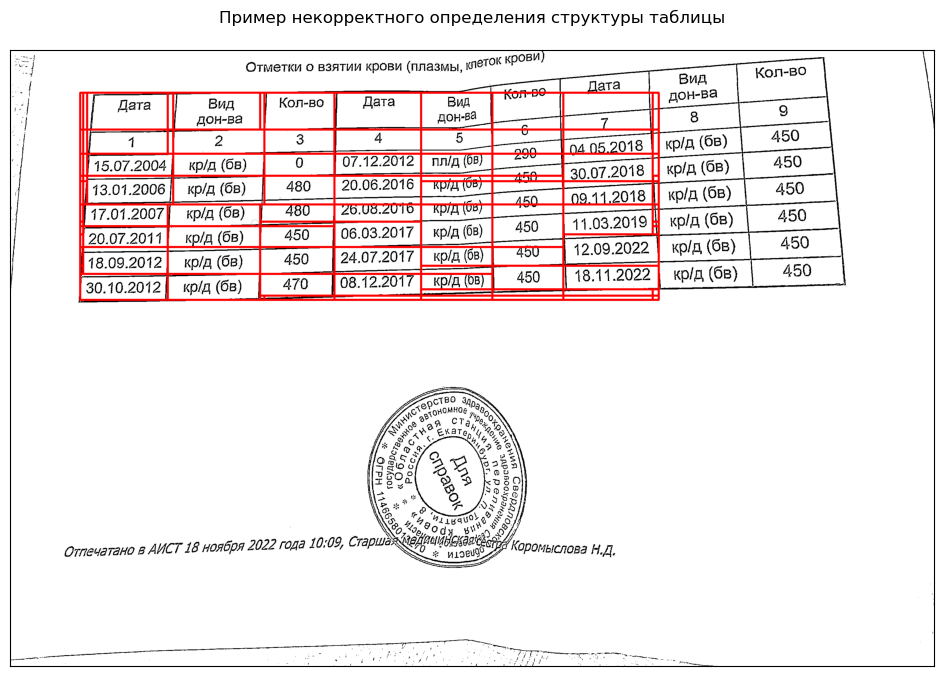

In [121]:
fig = plt.figure(figsize=(16, 8))
plt.title('Пример некорректного определения структуры таблицы', pad=20)
plt.imshow(Image.open('err_table.png'))  
plt.xticks([])
plt.yticks([])
plt.show()

__Результаты работы алгоритма:__  

Значительное количество изображений содержат искажения, что мешает точному определению структуры таблицы - появляются лишние разбиения, теряется часть колонок и т.д. Привести такую таблицу к состоянию, подходящем для распознавания текста в ней почти невозможно. Дополнительным фактором снижающим число объектов для распознавания является "зарегулированность" написанного кода. Как следствие - всего одно-два изображения из всего датасета распознались качественно, а подавляющее большинство не распозналось вовсе.

### Версия 2: исправление перспективы + `img2table` + коррекция разметки + `pytesseract`

Основным препятствием к распознанию текста оказалось некорректное определение структуры таблицы библиотекой `img2table`. Это связано прежде всего с искажениями на изображении. Проблему предположительно должно решить исправление геометрической перспективы. [Данная версия](https://github.com/maresin/some_projects/blob/main/Form405_OCR/previouse_version/Form405_class_v2_no_img2table.ipynb) включает значительно переработанную версию функции предобработки, направленную на решение этой задачи. Опишем алгоритм ее действия:  

__Обработка оригинального изображения:__  
- стандартизация размеров изображений по ширине через масштабирование (желаемая ширина 3000 точек);
- далее уже использованные шаги предобработки.  

__Поиск контуров таблицы:__  
Для определения контуров таблицы необходимо восстановить разорванные линии границ таблицы, также желательно избавиться от всех мелких объектов. Делается это с использованием разных приемов. Кроме того, стоит обратить внимание на то, изображение для поиска контуров таблицы (и координат ячеек) окажется очень огрубленным и не подойдет для распознавания текста - необходимо позаботиться о параллельной обработке изображения, пригодного для распознавания.
- создание копии изображения и ее подготовка;
- конверсия цвета изображения в инверсивный черно-белый;
- расширение и объединение светлых контуров;
- удаление шумов;
- закрытие контуров;
- определение границ таблицы с помощью поиска контуров заданной длины;
- обрезка изображения и его копии под размер таблицы.  

__Определение углов таблицы для исправления перспективы:__  
На обрезанном изображении оказывается лишь сама таблица, на ней отсутствуют второстепенные элементы с карточки и это должно облегчить поиск угловых элементов таблицы. После их обнаружения можно использовать метод исправления перспективы `cv2.getPerspectiveTransform` из популярной библиотеки обработки изображений _OpenCV._
- задание желаемого размера ячеек для поиска контуров; 
- поиск ячеек, расположенных ближе всего к углам обрезанного изображения;
- получение исходных и конечных координаты для преобразования;
- создание матрицы преобразования и непосредственно исправление перспективы.

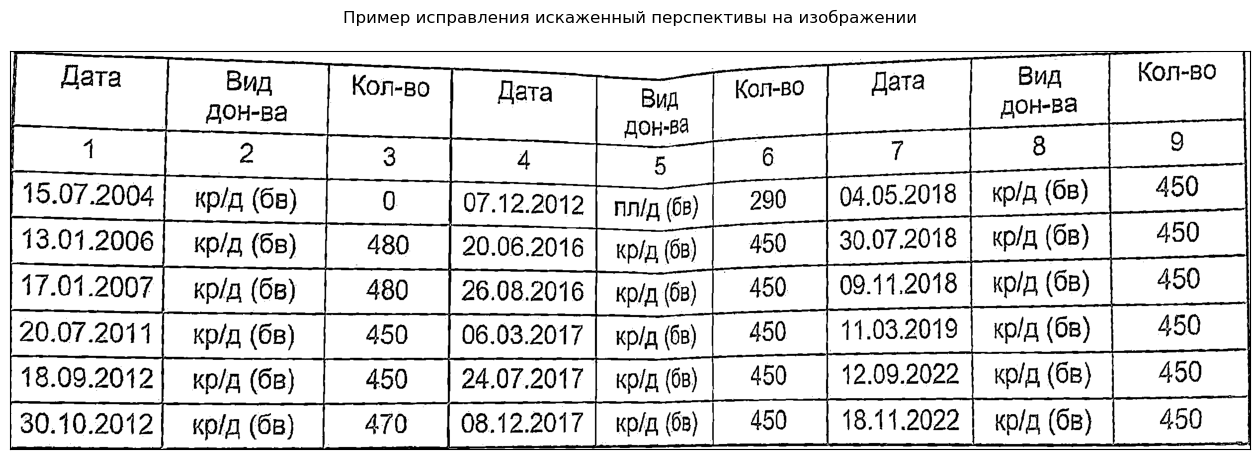

In [126]:
fig = plt.figure(figsize=(16, 8))
plt.title('Пример исправления искаженный перспективы на изображении', pad=20)
plt.imshow(Image.open('corr_table_best.png'))  
plt.xticks([])
plt.yticks([])
plt.show()

__Результаты работы алгоритма:__  

Значительное количество изображений было улучшено с помощью данного подхода, включая изображения с низким качеством. Однако, часть была даже сильнее искажена, чем до преобразования. Так что, от этой версии также пришлось отказаться.

## Измененный подход к решению задачи проекта

### Версия 3: _EasyOCR_ + парсинг

Подход с определением контуров таблицы и ячеек как с помощью готовых библиотек, так и за счет самостоятельных решений оказался бесперспективен. А программа _Tesseract_ показала недостаточную точность распознавания даже выделенного текста.  

Было принято решение использовать другую программу оптического распознавания текста - _EasyOCR_. Она представляет собой обученную нейросеть, построенную с помощью библиотеки _Torch_. Она выделяет на изображении таблицы, а ищет текст и возвращает результат его распознавания вместе с пространственными метками. Таким образом, основная задача обработки сводиться к тому, чтобы распарсить эти метки и объединить в общую таблицу результаты распознавания. Качество распознавания у _EasyOCR_ достаточно хорошее, но при этом геометрические искажению всё-также сильно влияют на структуру записей.  
Парсинг стоит начать с выделения столбцов - их число в документах часто повторяется и их можно быстро и легко кластеризовать. Парсинг строк представляет большую проблему - строки сами по себе гораздо уже, и сильнее смещены относительно друг друга.
Основной подход для парсинга строк следующий - середина текста следующей (правой) ячейки должна оказаться в границах текста предыдущей (левой) ячейки. Верхняя и нижняя границы этого бокса могут быть при этом немного раздвинуты.  

[Данный измененный подход](https://github.com/maresin/some_projects/blob/main/Form405_OCR/class_form405.py) к задаче распознавания по-прежнему реализован в виде класса, но с меньшим количеством атрибутов и методов. В атрибутах сохраняется много промежуточных результатов, большинство методов приватные, вся основная работа производиться в теле одного метода - `recognize_image()`.  

Опишем этапы работы алгоритма:  
1. Предобработка изображения в виде обрезки его верхней части;
2. Получение первичных данных распознавания с помощью _EasyOCR_;
3. Сведение полученных первичных данных в одну таблицу;
4. Отсев мусорных данных, не относящихся к записям о донациях;
5. Парсинг горизонтальных пространственных меток через кластеризацию столбцов;
6. Парсинг вертикальных пространственных меток через наращивание строки с близкими параметрами;
7. Создание таблицы данных по результатам парсинга;
8. Коррекция записей в таблице данных;
9. Формирование выходной таблицы данных. 

Проверим работу алгоритма. Для оценки точности распознавания будем сравнивать только совпадающие даты исходного и сгенерированного csv-файлов (остальные два поля в учет приниматься не будут). Дублирование дат маловероятно, так как маловероятен факт, что донор несколько раз в день сдавал кровь. 

In [170]:
import pandas as pd
import warnings
import class_form405

warnings.filterwarnings("ignore")

successfully_recognized = 0
total_records = 0
# проход по всем изображением
for img in images:
    doc = class_form405.Form405(img[1], "405/")
    # распознавание и запись атрибутов
    doc.recognize_image()
    try:        
        # уже заполненный csv-файл из исходных данных
        df_original = pd.read_csv("405/"+doc.person_id+".csv")
        total_records += len(df_original)
        for row_original in df_original.itertuples():
            # проход по строкам датафрейма с распознанным текстом
            try:
                for row_recognised in doc.df_recognised.itertuples():
                    # дата донации находится в 4-ом столбце
                    if row_recognised.date == row_original[4]:
                        # фиксация совпадений
                        successfully_recognized += 1
            # переход к следующему изображению
            except:
                print('Файл с распознанным текстом не создан!')
                break
    # переход к следующему изображению
    except:
        print('Файл с текстом отсутствует в исходных данных!')
        break
        
print(f'Точность распознавания {successfully_recognized/total_records:.3f}')

Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.


Файл с распознанным текстом не создан!


Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.


Файл с текстом отсутствует в исходных данных!
Точность распознавания 0.601


__Результаты работы алгоритма:__  
Полностью не распознанными оказались 2-3 изображения с откровенно низким качеством. Еще часть изображений малого размера оказалась распознаны лишь частично. Все изображения крупного и среднего размера достаточно хорошо распознались. При этом были распознаны не только поля с датой, но и поля с типом донации и количеством забранной крови.

## Практическая реализация распознавания текста

### ... в виде скриптов

Проект реализован в виде исполняемого скрипта `start_ocr.py` и импортируемого модуля с кодом класса `class_form405.py`. Обработка изображения проводится на _CPU._ На обработку каждого из них уходит меньше 1 минуты.

__Инструкция по использованию (для _Windows_):__  
    Предполагается, что файлы с фотографиями справок будут храниться в директории `/resources` вместе с файлами `class_form405.py` и `ocr.py`. Перед началом сканирования необходимо создать рабочую папку с этими файлами и папкой для хранения. Для сканирования можно воспользоваться командной строкой _Windows_:

- нажать `Win+R`;
- ввести `cmd`;
- перейти в рабочую директорию - `сd <my_path/my_dir>`;
- запустить файл скрипта - `python start_ocr.py`;
- если _Python_ устанавливался с помощью _Anaconda_, возможно в переменных средах придётся прописать путь к файлу `python.exe`;
- после приглашения ввести имя файла изображения;
- файл с распознанными данными в виде csv-файла будет сохранён в директории `/resources`;
- при первом запуске скрипта должны загрузиться файлы модели `cyrillic_g2.pth` и `craft_mlt_25k.pth`(можно взять [отсюда](https://drive.google.com/file/d/10XZjccbG53hgLTqGCoyjRToD4Cfa-EQV/view?usp=sharing)). В _Windows_ они будут сохранены в папку `c:\Users\<Имя пользователя>\.EasyOCR\model\`.

### ... в виде _docker_-образа

Для ускорения развертывания системы распознавания проекта было решено использовать _Docker_-виртуализацию на основе _Linux._ Скрипты для этого варианта немного отличаются. В первую очередь это касается места хранения файлов моделей `cyrillic_g2.pth` и `craft_mlt_25k.pth`. Дело в том, что _EasyOCR_ не подключает эти файлы (обычно они скачиваются из интернета при первом запуске программы). Была попытка скопировать их в директорию, заданную по умолчанию. Также можно назначить путь к файлам самостоятельно - был выбран этот вариант, а файлы были скопированы в папку `model/` в рабочую директорию приложения. К сожалению, этот способ также не заработал. Все же приведем описание данной реализации [(файлы для сборки _docker_-образа)](https://github.com/maresin/some_projects/tree/main/Form405_OCR/for_docker).  

_EasyOCR_ имеет довольно много зависимостей, в частности, необходимо установить _Torch, OpenCV_ и _Pillow_ (ниже 10.0-ой версии)._

__Содержание файла `requirements.txt`:__  
~~~
numpy
pandas
scikit-learn
pillow==9.5.0
Levenshtein
easyocr
~~~

__Содержание `Dockerfile`:__  
~~~
FROM python:latest
RUN mkdir -p /usr/src/app/
WORKDIR /usr/src/app/
COPY . /usr/src/app/
RUN pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cpu
RUN pip install -r requirements.txt
CMD ["python", "start_ocr.py"]
~~~

Как уже говорилось в каталоге приложения должна находиться папка с моделями  - `model/`. В другой, внешней папке будут храниться сами изображения и записываться csv-файлы результатов распознавания.  В примере создания контейнера - это папка `c:/temp/form/resources`.

__Команды для сборки образа и запуска контейнера:__  
~~~
docker build -t ocr-app .
docker run -it --rm --name ocr-app -v c:/temp/form/resources:/usr/src/app/resources ocr-app
~~~

## Выводы по проекту

В процессе работы над проектом были рассмотрены несколько вариантов подходов к решению задачи распознавания текста. Основной заключался в том, чтобы сначала определить структуру таблицы с записями, а затем распознать текст в ее ячейках. Однако, множественные и разнотипные геометрические искажения на изображениях этого сделать не позволили. Изображения решено было распознавать "как есть" с помощью программы _EasyOCR_, а затем парсить пространственные метки, которые она выдавала. Такой подход дал достаточно качественные результаты.  
Само решение было реализовано в виде класса `class_form405` и оформлено в виде скриптов. Была попытка создать приложение на основе _docker_-образа, но файлы с моделями передать в программу _EasyOCR_ не удалось.  

Был реализован дополнительный функционал:  
- при запуске стартового скрипта предусмотрена возможность выбора распознавания одиночного файла или всех нераспознанных файлов;
- также присутствует возможность немедленного или отложенного запуска нераспознанных файлов;
- распознавание отдельных файлов выполняется асинхронно;
- предусмотрено сохранение логов обработки в рабочей директории.